# 数据挖掘项目

1.导入相应的库和数据（注意原文件不是UTF-8编码，需要调整一下）

In [80]:
# data processing
import numpy as np
import pandas as pd
from pandas import datetime

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

#read data
data=pd.read_csv("D:/github/data.csv")


2.数据描述

In [81]:
data.describe()

,Unnamed: 0,custid,trade_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
count,4754.000000,4.754000e+03,4.754000e+03,4752.000000,4752.000000,4754.000000,4751.000000,4752.000000,4752.000000,4752.000000,...,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4450.000000,4457.000000
mean,6008.414178,1.690993e+06,2.018050e+31,0.021806,0.901294,1940.197728,14.160674,0.804411,0.365425,17.502946,...,3390.038142,1820.357864,9187.009199,76.042630,4.732331,5.227507,16153.690823,8007.696881,24.112809,55.181512
std,3452.071428,1.034235e+06,1.812890e+18,0.041527,0.144856,3923.971494,694.180473,0.196920,0.170196,4.475616,...,1474.206546,583.418291,7371.257043,14.536819,2.974596,3.409292,14301.037628,5679.418585,37.725724,53.486408
min,5.000000,1.140000e+02,2.018050e+31,0.000000,0.000000,0.000000,0.000000,0.120000,0.033000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000
25%,3106.000000,7.593358e+05,2.018050e+31,0.010000,0.880000,0.000000,0.615000,0.670000,0.233000,15.000000,...,2300.000000,1535.000000,4800.000000,77.000000,2.000000,3.000000,7800.000000,4737.000000,5.000000,10.000000
50%,6006.500000,1.634942e+06,2.018050e+31,0.010000,0.960000,500.000000,0.970000,0.860000,0.350000,17.000000,...,3100.000000,1810.000000,7700.000000,79.000000,4.000000,5.000000,13800.000000,7050.000000,14.000000,36.000000
75%,8999.000000,2.597905e+06,2.018050e+31,0.020000,0.990000,2000.000000,1.600000,1.000000,0.480000,20.000000,...,4300.000000,2100.000000,11700.000000,80.000000,7.000000,7.000000,20400.000000,10000.000000,24.000000,91.000000
max,11992.000000,4.004694e+06,2.018050e+31,1.000000,1.000000,68000.000000,47596.740000,1.000000,0.941000,42.000000,...,10000.000000,6900.000000,87100.000000,87.000000,18.000000,20.000000,266400.000000,82800.000000,360.000000,323.000000


In [82]:
data.head()

,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,2.018050e+31,卡号1,0.01,0.99,0,0.90,0.55,0.313,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,2.018050e+31,卡号1,0.02,0.94,2000,1.28,1.00,0.458,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,2.018050e+31,卡号1,0.04,0.96,0,1.00,1.00,0.114,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,2.018050e+31,卡号1,0.00,0.96,2000,0.13,0.57,0.777,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,2.018050e+31,卡号1,0.01,0.99,0,0.46,1.00,0.175,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0


3.删除无关变量

In [83]:
#trade_no，bank_card_no几乎是常量，custid推测为每个用户的id，也无关
data=data.drop(['trade_no','bank_card_no','custid','source'],axis=1)

4.查看缺失值，此处参考chen19830的代码

In [84]:
def missing_values_table(df):
    #Total missing values
    mis_val=df.isnull().sum()
    
    #Percentage of missing values
    mis_val_percent=100*df.isnull().sum()/len(df)
    
    #Make a table with the results
    mis_val_table=pd.concat([mis_val,mis_val_percent],axis=1)
    
    #Rename the columns
    mis_val_table_ren_columns=mis_val_table.rename(columns={0:'Missing Values',1:'% of Total Values'})
    
    #Sort the table by percentage of missing descending
    mis_val_table_ren_columns=mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1]!=0].sort_values('% of Total Values',ascending=False).round(1)
    
    #Print some summary information
    print("Your selected dataframe has "+str(df.shape[1])+" columns.\n"+"There are "+str(mis_val_table_ren_columns.shape[0])+" columns that have missing values.")
    
    #Return the dataframe with missing informarion
    return mis_val_table_ren_columns

missing_values=missing_values_table(data)
missing_values.head()


Your selected dataframe has 86 columns.
There are 74 columns that have missing values.


,Missing Values,% of Total Values
student_feature,2998,63.1
cross_consume_count_last_1_month,426,9.0
query_cash_count,304,6.4
latest_six_month_apply,304,6.4
latest_one_month_apply,304,6.4


In [85]:
#注意到student_feature大部分都为1，其余为nan,此时考虑将nan填充为0
data['student_feature'].describe()
data['student_feature']=data['student_feature'].fillna(0)
data['student_feature'].describe()

count    4754.000000
mean        0.369794
std         0.483670
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: student_feature, dtype: float64

In [111]:
#其他考虑用均值填充,注意到其中有两个文字变量，两个时间变量
cols = missing_values.index
list=['latest_query_time','loans_latest_time','id_name','reg_preference_for_trad']
for col in cols:   
    if col not in list:
        data[col] = data[col].fillna(data[col].mean())

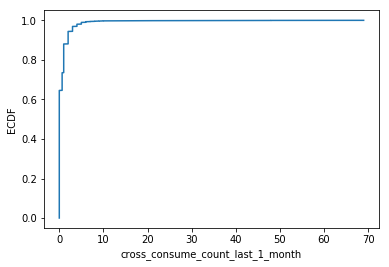

In [112]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF
#对cross_consume_count_last_1_month进行分析有：
cdf = ECDF(data['cross_consume_count_last_1_month'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.xlabel('cross_consume_count_last_1_month'); plt.ylabel('ECDF');

划分数据集

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data['status'], test_size=.3, random_state=2018)